In [5]:
import os  #For path related work
import cv2  #For image related work
import numpy as np  #Working with array
import matplotlib.pyplot as plt  #For ploting images
from sklearn.model_selection import train_test_split  #Deviding data in training and testing
import tensorflow as tf  #For neural network
import random  #For guessing a number

In [6]:
#Pneumonia X-ray scans
P = "/content/drive/MyDrive/Colab Notebooks/Models/Pneumonia/pneumonia"
pneumonia = os.listdir(P)

#Normal X-ray scans
N = "/content/drive/MyDrive/Colab Notebooks/Models/Pneumonia/normal"
normal = os.listdir(N)

In [7]:
pneumonia = pneumonia[:len(normal)]  #Making both data in equal amount

In [8]:
X = []
y = []

In [9]:
for img in pneumonia:
    img_path = os.path.join(P, img)
    
    img_array = cv2.imread(img_path)  #Reading images
    img_array = img_array / 255.0  #Compressing image array in 0 to 1

    i = cv2.resize(img_array, (100, 100), interpolation = cv2.INTER_NEAREST)  #Resizing image
    X.append(i)
    y.append(1)

In [10]:
for img in normal:
    img_path = os.path.join(N, img)

    img_array = cv2.imread(img_path)
    img_array = img_array / 255.0

    i = cv2.resize(img_array, (100, 100), interpolation = cv2.INTER_NEAREST)
    X.append(i)
    y.append(0)

In [11]:
#Converting to numpy array
X = np.array(X)
y = np.array(y)

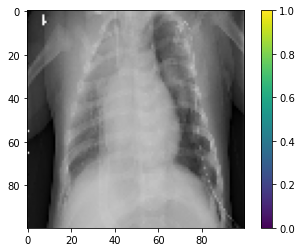

In [12]:
#Let's look at one image
plt.figure()
plt.imshow(X[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [14]:
#Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(30, activation='relu'), 
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_y, epochs=100)  #Training model

In [17]:
#Calculating accuracy
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=1) 
print('Test accuracy :', test_acc)

20/20 [==============================] - 0s 4ms/step - loss: 0.1211 - accuracy: 0.9543
Test accuracy : 0.9542586803436279


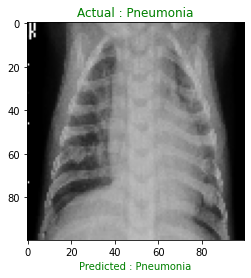

In [30]:
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['0', '1']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Actucal : Normal" if label == '0' else "Actual : Pneumonia")
    plt.xlabel("Predicted : Normal" if guess == '0' else "Predicted : Pneumonia")
    plt.grid(False)
    plt.show()

t = random.randint(0, len(test_X))
image = test_X[t]
label = test_y[t]
predict(model, image, label)